<a href="https://colab.research.google.com/github/aws3ma/machine-learning/blob/main/sc3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
ml_folder='/content/drive/MyDrive/ML/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
df=pd.read_csv(ml_folder+'Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df=df.iloc[:,3:]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
import seaborn as sns

In [ ]:
c=df.corr(method="pearson")
c

In [ ]:
df.skew()

In [ ]:
df.isna().sum()

In [ ]:
x = df.iloc[:,:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y = df.iloc[:,-1:]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
# sns.pairplot(data=df,hue='Exited')

In [ ]:
x = pd.get_dummies(x,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
y_train

,Exited
7389,0
9275,0
2995,0
5316,0
356,0
...,...
9225,0
4859,0
3264,0
9845,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train.iloc[:,:-3])
x_train.iloc[:,:-3]=sc.transform(x_train.iloc[:,:-3])
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,0,1,0
9275,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1,0,1
2995,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,0,0,0
5316,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,0,1,1
356,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1,0,0
4859,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,0,1,0
3264,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,0,0,1
9845,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,0,1,0


In [ ]:
x_test.iloc[:,:-3]=sc.transform(x_test.iloc[:,:-3])
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,1,0,0
898,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,0,0,0
2398,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,0,1,0
5906,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,0,0,1
2343,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,-0.263393,-1.421650,-1.377440,-1.215717,0.809503,0.642595,0.968738,1.404319,0,0,0
2899,-0.665441,-0.368904,0.698712,-1.215717,0.809503,0.642595,-1.032270,-0.511196,0,0,0
9549,-0.747912,-0.273200,-1.377440,1.297455,0.809503,0.642595,-1.032270,0.718885,0,1,1
2740,-0.005670,-0.464608,-0.339364,1.059752,-0.921591,0.642595,0.968738,-1.545078,1,0,1


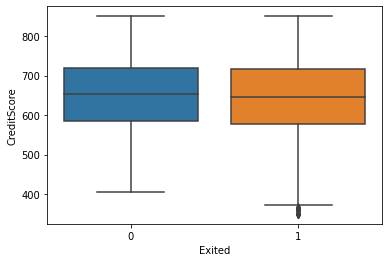

In [ ]:
sns.boxplot(x=df.Exited,y=df.CreditScore)

In [ ]:
df[df.CreditScore<=400]['Exited'].mean()

1.0

specificité et sensitivité
recall = TP/(TP+FN) = sensitivity = TPR
FPR = FP/(FP+TN)
specificity = 1 - FPR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


specificité et sensitivité <br>
sensivity = 1526/(1526+69) = 0.9567398119 <br>
FPR = 309/(309+96) = 0.762962963 <br>
specificity = 1 - 0.762962963 = 0.237037037

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1526,   69],
       [ 309,   96]])

propabilité de l'appartenance a la class 0 (!exited) et class 1(exited)

In [ ]:
y_pred_proba = lr.predict_proba(x_test)

array([0.20787478, 0.34465587, 0.14474633, ..., 0.2012932 , 0.1256668 ,
       0.23309563])

In [ ]:
y_pred_with_threshold = (y_pred_proba[:,1] >= 0.6).astype(int)
confusion_matrix(y_test,y_pred_with_threshold)

array([[1567,   28],
       [ 353,   52]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


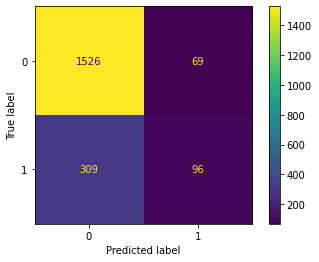

In [ ]:
plot_confusion_matrix(lr, x_test, y_test)  

In [ ]:
from sklearn.metrics import roc_curve,plot_roc_curve


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


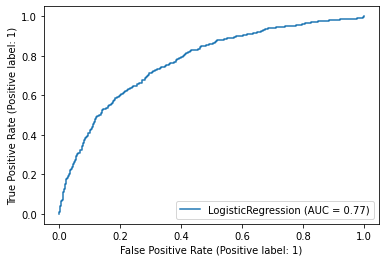

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba[:,1])

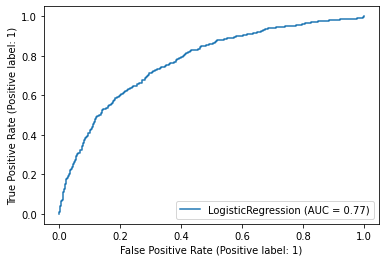

In [ ]:
plot_roc_curve(lr, x_test, y_test)

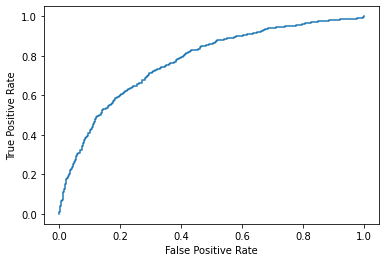

In [ ]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

AUC calculer l'air au dessous du courbe

In [ ]:
roc_auc_score(y_test,  y_pred_proba[:,1])

0.7722481520182669

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(5)
knc.fit(x_train,y_train)
knc.score(x_train,y_train)
y_pred = knc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


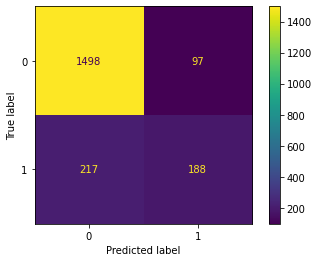

In [ ]:
plot_confusion_matrix(knc, x_test, y_test)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


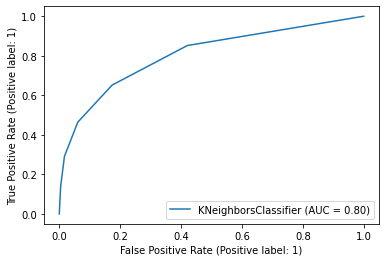

In [ ]:
plot_roc_curve(knc, x_test, y_test)

In [ ]:
y_pred_proba2 = knc.predict_proba(x_test)
fpr2, tpr2, th = roc_curve(y_test,  y_pred_proba2[:,1])

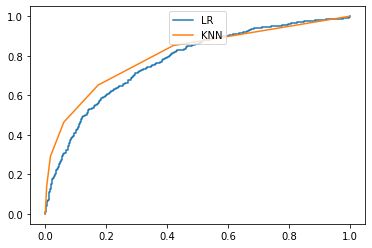

In [ ]:
plt.plot(fpr,tpr,label="LR")
plt.plot(fpr2,tpr2,label="KNN")
plt.legend(loc='upper center')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knc, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)

In [ ]:
knc9 = KNeighborsClassifier(9)
knc9.fit(x_train,y_train)
knc9.score(x_train,y_train)
y_pred9 = knc9.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
fpr9, tpr9, _9 = roc_curve(y_test,  y_pred_proba[:,1])

In [ ]:
plt.plot(fpr,tpr,label="LR")
plt.plot(fpr9,tpr9,label="KNN9")
plt.legend(loc='upper center')
plt.show()